<a href="https://colab.research.google.com/github/snugpenguin968/Rice-Datathon/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.1/229.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 804.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.7/416.7 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.5/120.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import seaborn as sns

#Data Loading and Initial Inspection

In [ ]:
df=pd.read_csv("/content/sample_data/training.csv",index_col=False)
df=df.drop(labels=['Unnamed: 0'],axis=1)

In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,...,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,bin_lateral_length,pad_id,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
count,2.969200e+04,2.969200e+04,2.760500e+04,2.760500e+04,29692.000000,22135.000000,2752.000000,1.908000e+04,1.907600e+04,28197.000000,...,18656.000000,1.865600e+04,22135.000000,29692.000000,14768.000000,2.869100e+04,2.869100e+04,2.898100e+04,2.898100e+04,19306.000000
mean,1.020863e+06,1.075477e+06,1.020478e+06,1.079357e+06,1157.264347,6533.676565,28.240552,7.624826e+05,4.020891e+06,8992.459594,...,0.231901,inf,1.380596,109024.135828,49.523158,1.020062e+06,1.078012e+06,1.020469e+06,1.076462e+06,219.854511
std,1.721561e+05,3.156502e+05,1.702888e+05,3.162917e+05,107.281214,2504.368680,13.612821,8.122641e+05,2.721153e+06,1881.585517,...,1.166795,NaN,0.481280,5196.020035,63.104234,1.703143e+05,3.155907e+05,1.713936e+05,3.155836e+05,155.790160
min,5.357005e+05,4.951165e+05,5.323590e+05,4.957629e+05,1001.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1994.094488,...,0.000000,7.830841e-03,0.000000,100001.000000,0.000000,5.400136e+05,4.961486e+05,5.323590e+05,4.957629e+05,0.011905
25%,8.903506e+05,8.043973e+05,8.911762e+05,8.061600e+05,1060.000000,4341.535433,17.000000,3.642857e+05,1.871676e+06,7862.204724,...,0.162421,4.268300e+00,1.000000,104516.000000,24.000000,8.914115e+05,8.051170e+05,8.908974e+05,8.046434e+05,107.918152
50%,1.019947e+06,9.893755e+05,1.017596e+06,1.000664e+06,1144.000000,6684.055118,27.000000,7.013834e+05,3.564951e+06,9148.622047,...,0.194734,5.135199e+00,1.500000,109018.500000,38.000000,1.018147e+06,9.986236e+05,1.017865e+06,9.938718e+05,192.767887
75%,1.133213e+06,1.366018e+06,1.132495e+06,1.369018e+06,1231.000000,8899.114173,38.000000,1.087321e+06,5.843925e+06,10354.330710,...,0.234285,6.156844e+00,2.000000,113492.000000,60.000000,1.132536e+06,1.367010e+06,1.132084e+06,1.366495e+06,298.073218
max,1.728209e+06,1.811475e+06,1.729432e+06,1.811882e+06,1354.000000,15744.094490,70.000000,9.109073e+07,3.442402e+07,14051.181100,...,127.700206,inf,3.000000,117976.000000,4827.000000,1.728874e+06,1.811592e+06,1.729656e+06,1.811770e+06,2855.469490


In [ ]:
df

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,...,relative_well_position,batch_frac_classification,well_family_relationship,frac_type,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
0,1383493.751,717329.2368,1382854.564,712767.3700,1121,3963.582677,NaN,76000.0000,NaN,8712.598425,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383030.678,714796.3610,1382668.912,712798.4321,46.623023
1,1380344.035,711916.2732,1379738.429,707860.5643,1022,3179.133858,NaN,113000.0000,5.610964e+05,8627.952756,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379965.126,709541.7145,1379630.025,707907.6708,59.750009
2,1379915.895,717845.0063,1379274.644,713471.9952,1304,3810.039370,12.0,286571.4286,1.621424e+06,8801.181102,...,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac,92.0,1379357.250,715381.2327,1378960.372,713530.4490,10.785716
3,1383567.443,706640.2010,1382891.477,702068.3838,1022,3723.425197,11.0,106878.9286,4.377134e+05,8635.826772,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383099.610,704058.8508,1382727.299,702098.4882,123.797638
4,1378962.585,702623.9787,1379643.546,707204.9131,1022,3811.023622,NaN,112789.7143,6.229802e+05,8664.370079,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379546.414,705150.7519,1379987.487,707123.7258,102.309540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29687,1441088.593,978921.8705,1432758.032,979984.5869,1050,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN
29688,1513299.189,976157.4486,1519890.072,975148.4820,1159,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN
29689,1458652.142,972862.2346,1453129.889,973195.0998,1050,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN
29690,1463417.436,972485.8276,1468807.765,971564.9743,1153,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isna().sum()

surface_x                           0
surface_y                           0
bh_x                             2087
bh_y                             2087
standardized_operator_name          0
gross_perforated_length          7557
number_of_stages                26940
total_proppant                  10612
total_fluid                     10616
true_vertical_depth              1495
ffs_frac_type                   15107
proppant_intensity              10721
frac_fluid_intensity            10746
average_stage_length            26968
average_proppant_per_stage      27003
average_frac_fluid_per_stage    27005
proppant_to_frac_fluid_ratio    11036
frac_fluid_to_proppant_ratio    11036
bin_lateral_length               7557
pad_id                              0
relative_well_position           9225
batch_frac_classification        9225
well_family_relationship         9225
frac_type                           0
frac_seasoning                  14924
horizontal_midpoint_x            1001
horizontal_m

# Data Visualization

In [ ]:
viz_df=df.copy()

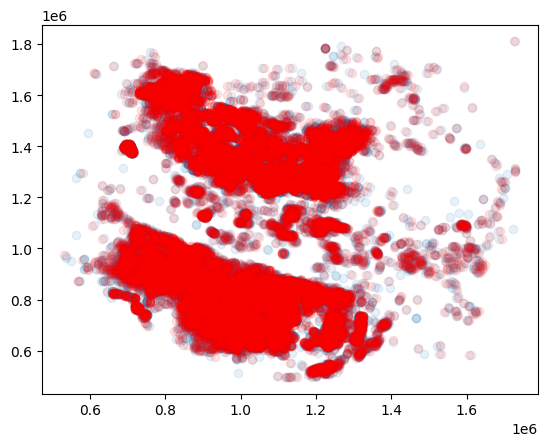

In [ ]:
plt.scatter(viz_df['surface_x'], viz_df['surface_y'], alpha=0.1)
plt.scatter(viz_df['bh_x'], viz_df['bh_y'], color='red', alpha=0.1)

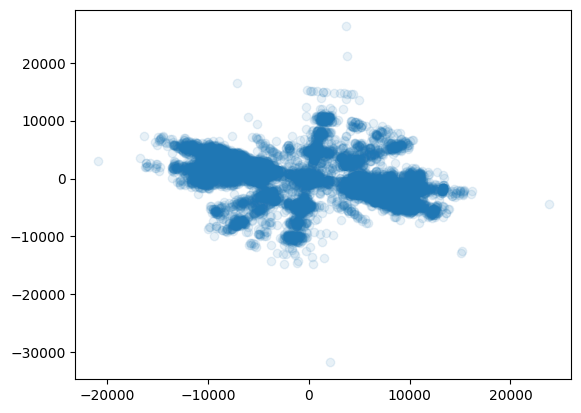

In [ ]:
viz_df['diff_x'] = viz_df['surface_x'] - viz_df['bh_x']
viz_df['diff_y'] = viz_df['surface_y'] - viz_df['bh_y']

plt.scatter(viz_df['diff_x'], viz_df['diff_y'], alpha=0.1, label='Difference Plot')

Text(0.5, 1.0, 'X-Y Location of Bottom Hole from Surface Hole')

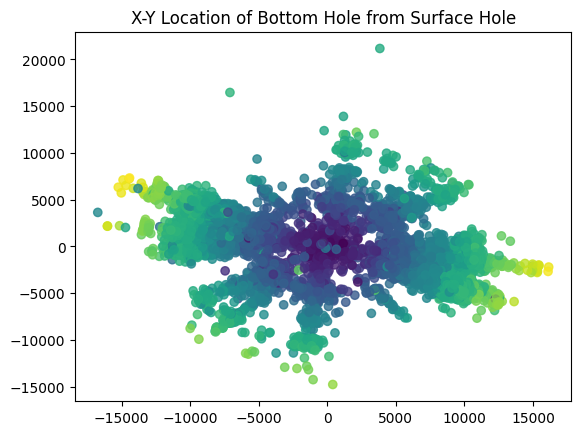

In [ ]:
scatter = plt.scatter(viz_df['diff_x'], viz_df['diff_y'], c=viz_df['gross_perforated_length'], cmap='viridis', alpha=0.8, label='Color Scatter Plot')
plt.title("X-Y Location of Bottom Hole from Surface Hole")

Text(0.5, 1.0, 'X-Y Location of Bottom Hole from Surface Hole')

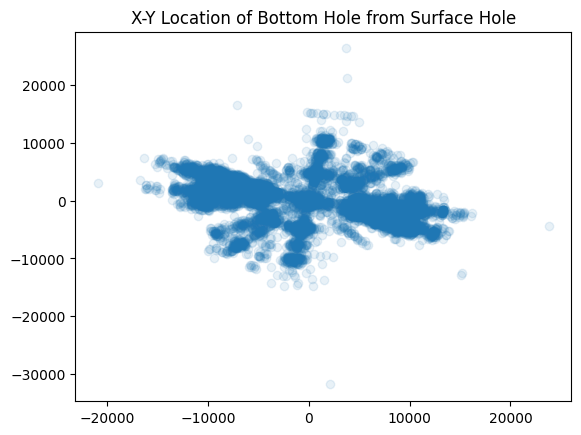

In [ ]:
viz_df[''] = viz_df['surface_x'] - viz_df['bh_x']
viz_df['diff_y'] = viz_df['surface_y'] - viz_df['bh_y']

plt.scatter(viz_df['diff_x'], viz_df['diff_y'], alpha=0.1, label='Difference Plot')


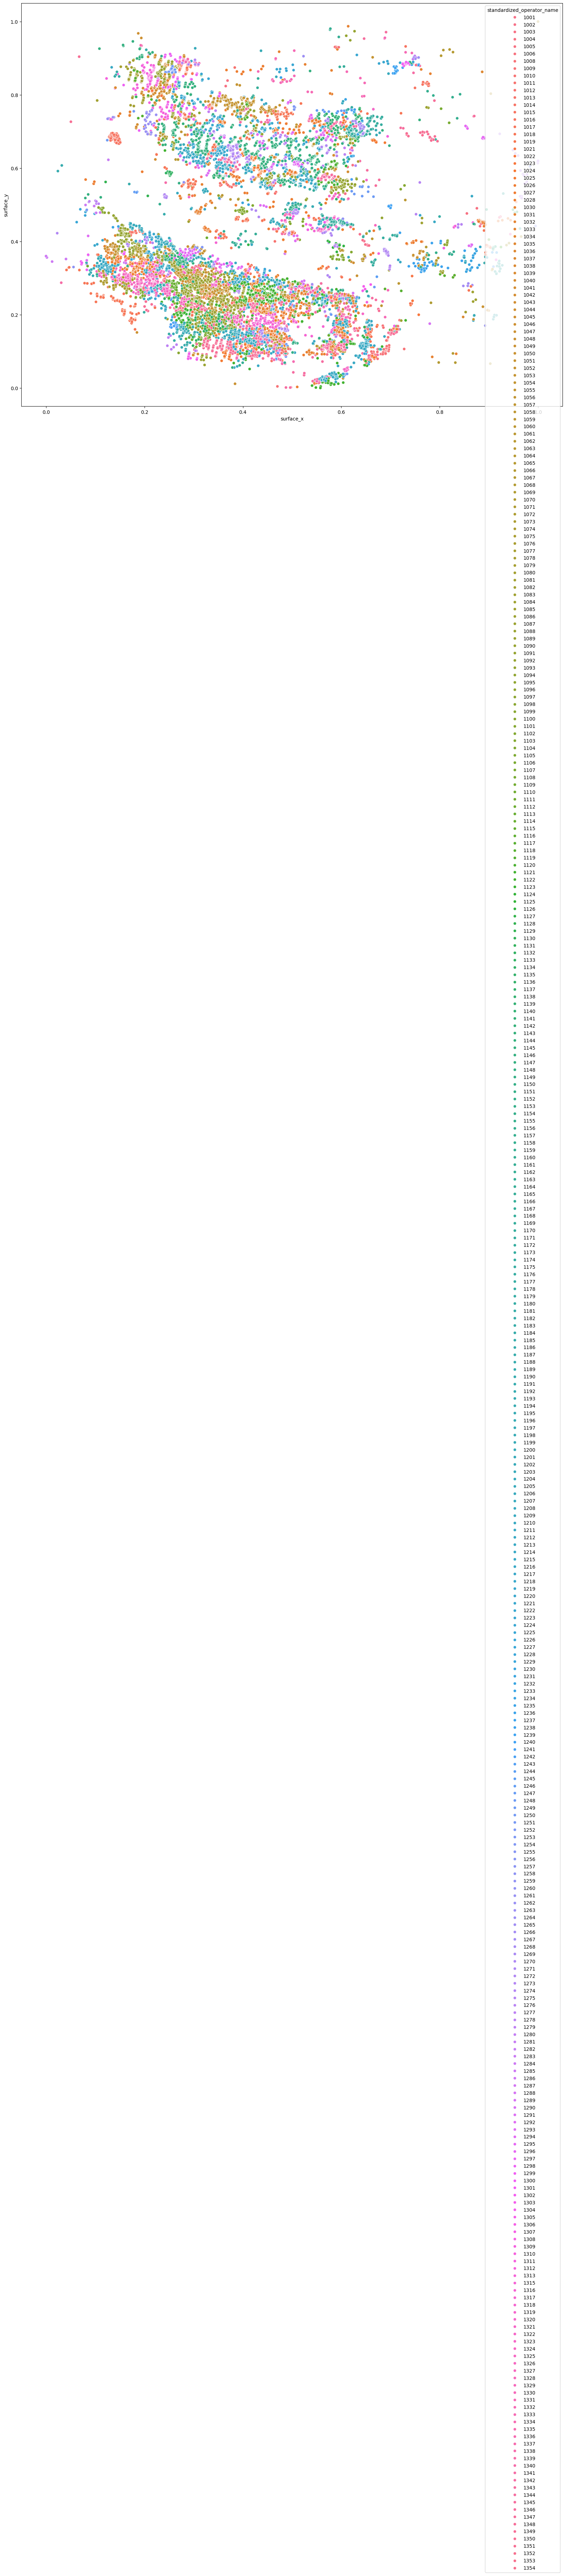

In [ ]:
sns.set_palette("husl")

plt.figure(figsize=(20, 15))  # Adjust the figure size as needed

viz_df['operator_mod'] = viz_df['standardized_operator_name'] // 100
sns.scatterplot(x='surface_x', y='surface_y', hue='standardized_operator_name', data=viz_df, palette='husl', legend='full')

plt.show()

#Data Preprocessing

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'float32']).columns

In [ ]:
numeric_columns

Index(['surface_x', 'surface_y', 'bh_x', 'bh_y', 'gross_perforated_length',
       'number_of_stages', 'total_proppant', 'total_fluid',
       'true_vertical_depth', 'proppant_intensity', 'frac_fluid_intensity',
       'average_stage_length', 'average_proppant_per_stage',
       'average_frac_fluid_per_stage', 'proppant_to_frac_fluid_ratio',
       'frac_fluid_to_proppant_ratio', 'bin_lateral_length', 'frac_seasoning',
       'horizontal_midpoint_x', 'horizontal_midpoint_y', 'horizontal_toe_x',
       'horizontal_toe_y', 'OilPeakRate'],
      dtype='object')

In [ ]:
#Ensure that the scaler can run
df=df.replace([np.inf, -np.inf], np.nan)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numeric_columns] = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

In [ ]:
#We want to use KNNImputer on every numeric feature except the target feature
numeric_columns=numeric_columns[:-1]

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df[numeric_columns]=imputer.fit_transform(df[numeric_columns])

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
numeric_columns=np.append(np.array(numeric_columns),'OilPeakRate')

In [ ]:
df[numeric_columns]=pd.DataFrame(mice_imputer.fit_transform(df[numeric_columns]),columns=numeric_columns)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
categorical_df=df.select_dtypes(include=['category','object'])
categorical_columns=categorical_df.columns
df[categorical_columns] = df[categorical_columns].apply(lambda series: pd.Series(
        LabelEncoder().fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    ))
imp_cat = IterativeImputer(estimator=RandomForestClassifier(),
                            initial_strategy='most_frequent',
                            max_iter=10, random_state=0)
df[categorical_columns] = imp_cat.fit_transform(df[categorical_columns])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns=np.append(np.array(categorical_columns),'standardized_operator_name')
df=pd.get_dummies(df, columns=categorical_columns)
df

,surface_x,surface_y,bh_x,bh_y,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,proppant_intensity,...,standardized_operator_name_1345,standardized_operator_name_1346,standardized_operator_name_1347,standardized_operator_name_1348,standardized_operator_name_1349,standardized_operator_name_1350,standardized_operator_name_1351,standardized_operator_name_1352,standardized_operator_name_1353,standardized_operator_name_1354
0,0.710933,0.168809,0.710479,0.164882,0.251750,0.180952,0.000834,0.031577,0.557224,0.001053,...,False,False,False,False,False,False,False,False,False,False
1,0.708292,0.164697,0.707876,0.161154,0.201925,0.176190,0.001241,0.016300,0.550204,0.001953,...,False,False,False,False,False,False,False,False,False,False
2,0.707933,0.169201,0.707488,0.165418,0.241998,0.171429,0.003146,0.047102,0.564571,0.004132,...,False,False,False,False,False,False,False,False,False,False
3,0.710995,0.160689,0.710510,0.156753,0.236497,0.157143,0.001173,0.012715,0.550857,0.001577,...,False,False,False,False,False,False,False,False,False,False
4,0.707133,0.157638,0.707797,0.160656,0.242061,0.152381,0.001238,0.018097,0.553224,0.001626,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29687,0.759230,0.367533,0.752167,0.367916,0.432837,0.171429,0.002615,0.031656,0.151228,0.002402,...,False,False,False,False,False,False,False,False,False,False
29688,0.819784,0.365433,0.824954,0.364242,0.384242,0.190476,0.001813,0.028131,0.269143,0.001792,...,False,False,False,False,False,False,False,False,False,False
29689,0.773958,0.362930,0.769185,0.362758,0.344857,0.171429,0.003690,0.046146,0.265732,0.002852,...,False,False,False,False,False,False,False,False,False,False
29690,0.777954,0.362644,0.782282,0.361519,0.303284,0.171429,0.002649,0.034683,0.298429,0.002903,...,False,False,False,False,False,False,False,False,False,False


#Data Modelling

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split

##### Feature Engineering

In [ ]:
df['distance_sur_bot'] = ((df['surface_x'] - df['bh_x'])**2 + (df['surface_y'] - df['bh_y'])**2)**0.5 + df['true_vertical_depth']
df['len_heel_toe'] = 2 * df['average_stage_length'] * ((df['horizontal_midpoint_x'] - df['horizontal_toe_x'])**2 + (df['horizontal_midpoint_y'] - df['horizontal_toe_y'])**2)**0.5
df['avg_stage_fluid'] = (df['average_proppant_per_stage'] + df['average_frac_fluid_per_stage']) * df['average_stage_length']
df['frac_fluid'] = df['average_stage_length'] * df['average_proppant_per_stage'] * df['frac_fluid_to_proppant_ratio']
df['norm_div_gpl'] = df['distance_sur_bot'] / df['gross_perforated_length']
df['intensity'] = (df['total_proppant'] * df['proppant_intensity'] + df['total_fluid'] * df['frac_fluid_intensity']) / df['gross_perforated_length']

In [ ]:
train_df, valid_df = train_test_split(df, test_size=0.2)
train_data = TabularDataset(train_df)
train_data.head()

,surface_x,surface_y,bh_x,bh_y,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,proppant_intensity,...,standardized_operator_name_1351,standardized_operator_name_1352,standardized_operator_name_1353,standardized_operator_name_1354,distance_sur_bot,len_heel_toe,avg_stage_fluid,frac_fluid,norm_div_gpl,intensity
1011,0.475795,0.182308,0.480699,0.181327,0.260940,0.295238,0.001430,0.073787,0.591347,0.001742,...,False,False,False,False,0.596349,0.002024,0.094689,0.003597,2.285384,0.029626
3778,0.468674,0.139086,0.461030,0.139762,0.273902,0.147619,0.001253,0.019251,0.451020,0.001344,...,False,False,False,False,0.458694,0.001967,0.251060,0.002036,1.674666,0.001110
16278,0.563732,0.589115,0.573169,0.585802,0.654664,0.595238,0.014770,0.221437,0.551429,0.007171,...,False,False,False,False,0.561430,0.002835,0.182919,0.001954,0.857586,0.042540
23070,0.362253,0.722565,0.371484,0.719122,0.601463,0.661905,0.013232,0.252903,0.569796,0.006992,...,False,False,False,False,0.579648,0.002798,0.154780,0.002128,0.963731,0.065826
25176,0.185653,0.288343,0.196191,0.288022,0.613466,0.728571,0.019395,0.246360,0.685388,0.010048,...,False,False,False,False,0.695931,0.002601,0.128538,0.001253,1.134425,0.060056


In [ ]:
label = "OilPeakRate"
train_data[label].describe()

count    23753.000000
mean         0.080333
std          0.048378
min         -0.032325
25%          0.045548
50%          0.079265
75%          0.107563
max          0.575510
Name: OilPeakRate, dtype: float64

In [ ]:
predictor = TabularPredictor(label=label, problem_type="regression").fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20240121_085425"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240121_085425"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
C

[1000]	valid_set's rmse: 0.0270979
[2000]	valid_set's rmse: 0.0267525
[3000]	valid_set's rmse: 0.0267542


	-0.0267	 = Validation score   (-root_mean_squared_error)
	20.61s	 = Training   runtime
	0.65s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.0267356


	-0.0266	 = Validation score   (-root_mean_squared_error)
	12.6s	 = Training   runtime
	0.4s	 = Validation runtime
Fitting model: RandomForestMSE ...
		Input X contains infinity or a value too large for dtype('float32').
Detailed Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 1817, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, total_resources=total_resources, **model_fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 1763, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, total_resources=total_resources, **model_fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 854, in fit
    out = self._fit(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/rf/rf_model.py", line 195, in _fit
    

[1000]	valid_set's rmse: 0.0263752


	-0.0264	 = Validation score   (-root_mean_squared_error)
	25.54s	 = Training   runtime
	0.61s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'CatBoost': 0.556, 'LightGBMLarge': 0.333, 'LightGBM': 0.111}
	-0.0259	 = Validation score   (-root_mean_squared_error)
	0.32s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 350.08s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240121_085425")


In [ ]:
test_data = TabularDataset(valid_df)

y_pred = predictor.predict(test_data.drop(columns=[label]))
y_pred.head()

1412     0.067838
7742     0.126184
11170    0.120795
7214     0.130599
19170    0.116278
Name: OilPeakRate, dtype: float32

In [ ]:
predictor.evaluate(test_data, silent=True)

{'root_mean_squared_error': -0.03061610970331889,
 'mean_squared_error': -0.0009373461733656573,
 'mean_absolute_error': -0.017110125266796013,
 'r2': 0.6398816418367076,
 'pearsonr': 0.8000883771063534,
 'median_absolute_error': -0.009756986690376689}

In [ ]:
predictor.leaderboard(test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.030616,-0.025917,root_mean_squared_error,5.385968,1.050826,312.090241,0.008189,0.001144,0.321562,2,True,5
1,CatBoost,-0.030859,-0.026151,root_mean_squared_error,0.180983,0.040052,273.635912,0.180983,0.040052,273.635912,1,True,3
2,LightGBMLarge,-0.030906,-0.026361,root_mean_squared_error,3.167188,0.607008,25.536741,3.167188,0.607008,25.536741,1,True,4
3,LightGBMXT,-0.031047,-0.026728,root_mean_squared_error,2.872170,0.649697,20.613391,2.872170,0.649697,20.613391,1,True,1
4,LightGBM,-0.031128,-0.026555,root_mean_squared_error,2.029608,0.402622,12.596026,2.029608,0.402622,12.596026,1,True,2


In [ ]:
feature_importance = predictor.feature_importance(train_df, "WeightedEnsemble_L2")
print(feature_importance)

These features in provided data are not utilized by the predictor and will be ignored: ['well_family_relationship_2.0', 'well_family_relationship_3.0', 'frac_type_1.0', 'standardized_operator_name_1004', 'standardized_operator_name_1008', 'standardized_operator_name_1009', 'standardized_operator_name_1010', 'standardized_operator_name_1012', 'standardized_operator_name_1019', 'standardized_operator_name_1021', 'standardized_operator_name_1024', 'standardized_operator_name_1027', 'standardized_operator_name_1032', 'standardized_operator_name_1033', 'standardized_operator_name_1034', 'standardized_operator_name_1036', 'standardized_operator_name_1038', 'standardized_operator_name_1043', 'standardized_operator_name_1044', 'standardized_operator_name_1045', 'standardized_operator_name_1046', 'standardized_operator_name_1047', 'standardized_operator_name_1048', 'standardized_operator_name_1050', 'standardized_operator_name_1052', 'standardized_operator_name_1054', 'standardized_operator_nam

                                   importance        stddev   p_value  n  \
total_proppant                   6.567470e-03  1.073416e-03  0.000083  5   
true_vertical_depth              6.152310e-03  9.095532e-04  0.000056  5   
gross_perforated_length          5.638939e-03  7.870390e-04  0.000044  5   
distance_sur_bot                 4.134975e-03  7.734159e-04  0.000140  5   
surface_y                        3.344820e-03  5.165091e-04  0.000066  5   
...                                       ...           ...       ... ..   
standardized_operator_name_1337 -1.793529e-07  1.371070e-06  0.607777  5   
standardized_operator_name_1266 -2.642769e-07  5.909412e-07  0.813050  5   
standardized_operator_name_1092 -3.464979e-07  6.373166e-07  0.854532  5   
standardized_operator_name_1304 -5.349030e-07  1.583846e-06  0.753914  5   
standardized_operator_name_1335 -1.992162e-06  4.998312e-06  0.788413  5   

                                     p99_high   p99_low  
total_proppant               